# Random Forest

## 1.	Import the needed Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2.	Import the tools needed in Sklearn

In [2]:
import sklearn
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## 3.   Create the dataset

In [3]:
iris=pd.read_csv("../../data/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 4.	Put your data in a data frame

In [7]:
data = pd.DataFrame({
    'sepal length':iris['SepalLengthCm'],
    'sepal width':iris['SepalWidthCm'],
    'petal length':iris['PetalLengthCm'],
    'petal width':iris['PetalWidthCm'],
    'species':iris['Species']
})


data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 5.	Define Feature and Target

In [8]:
x=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']

## 6.	Split dataset into training and validation set

In [9]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=42)
x_train

,sepal length,sepal width,petal length,petal width
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


## 7.	Train Random Forest Model 

(you can check the meaning of each parameter here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html )

In [10]:
rf_model=RandomForestClassifier(criterion="entropy", n_estimators=1, random_state=0)
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1, random_state=0)

## 8.    Test Model

In [11]:
print("Train data accuracy:", accuracy_score(y_true=y_train, y_pred=rf_model.predict(x_train)))
print("Test data accuracy:", accuracy_score(y_true=y_test, y_pred=rf_model.predict(x_test)))

Train data accuracy: 0.9464285714285714
Test data accuracy: 0.8947368421052632


In [13]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 9.	Plot the decision tree

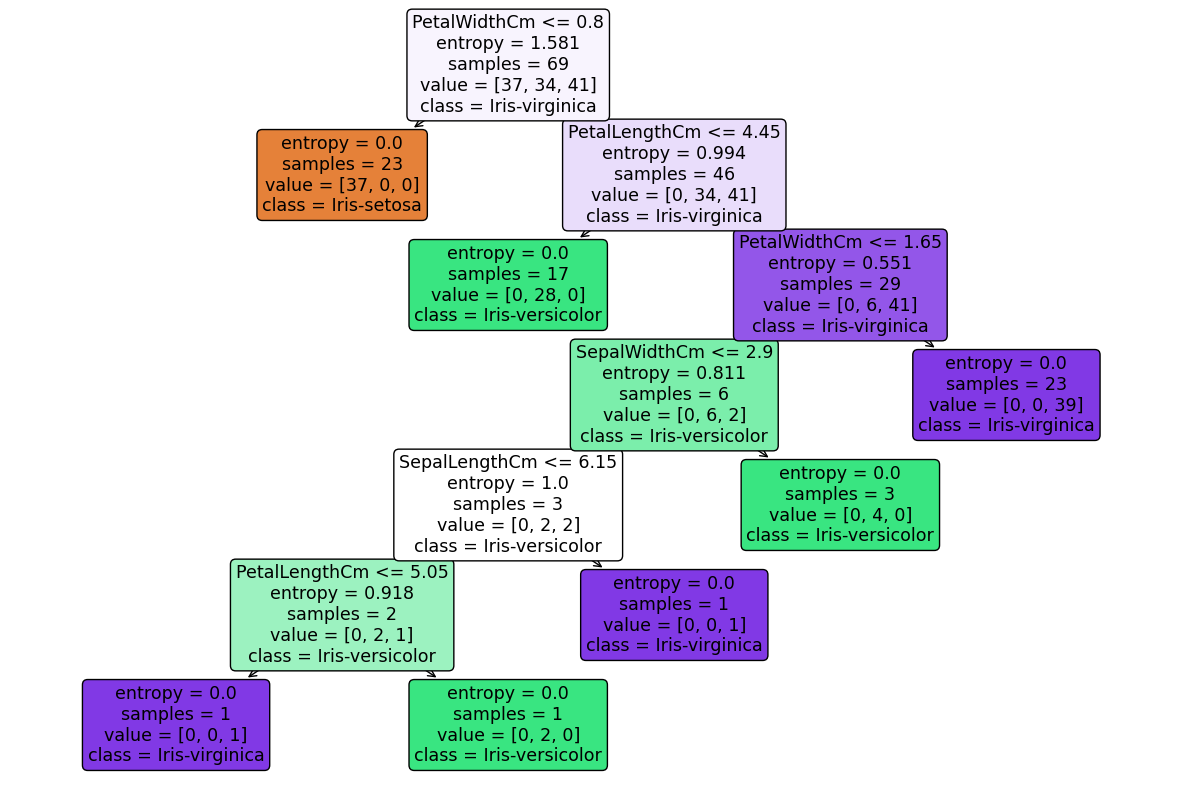

<Figure size 640x480 with 0 Axes>

In [21]:
# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(rf_model.estimators_[0], filled=True, rounded=True, class_names=iris['Species'].unique(), feature_names=iris.columns[1:5])
plt.show()

# save the plot
plt.savefig('../../visualizations/iris_random forest.png')

## 10.	Plot the confusion matrix

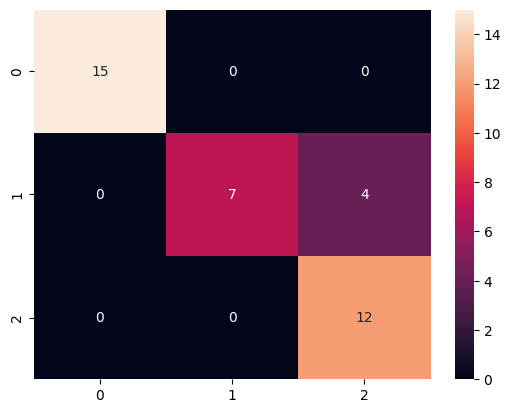

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, rf_model.predict(x_test))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

## 11.    Predict New Dataset